In [29]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
%matplotlib inline

## Extracts and save data

In [30]:
IMAGE_SIZE = 28

def extract_data(filename, num_images):
  """Extract the images into a 4D tensor [image index, y, x, channels].
  Values are rescaled from [0, 255] down to [-0.5, 0.5].
  """
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    #data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    return data


def extract_labels(filename, num_images):
  """Extract the labels into a vector of int64 label IDs."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
  return labels

In [31]:
# Extract MNIST into np arrays.
train_data = extract_data("train-images-idx3-ubyte.gz", 60000)
train_labels = extract_labels("train-labels-idx1-ubyte.gz", 60000)

test_data = extract_data("t10k-images-idx3-ubyte.gz", 10000)
test_labels = extract_labels("t10k-labels-idx1-ubyte.gz", 10000)

with open("mnist_data.pkl", "wb") as f:
    pickle.dump({
        'x_train' : train_data,
        'y_train' : train_labels,
        'x_test' : test_data,
        'y_test' : test_labels
    }, f, protocol=pickle.HIGHEST_PROTOCOL)

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


## Sanity Check

In [32]:
with open("mnist_data.pkl", "rb") as f:
    mnist = pickle.load(f)
    
x_train = mnist['x_train']
y_train = mnist['y_train']

x_test = mnist['x_test']
y_test = mnist['y_test']

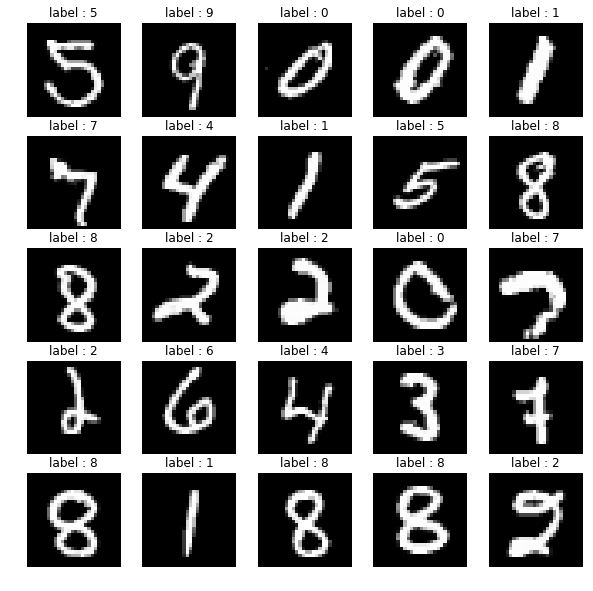

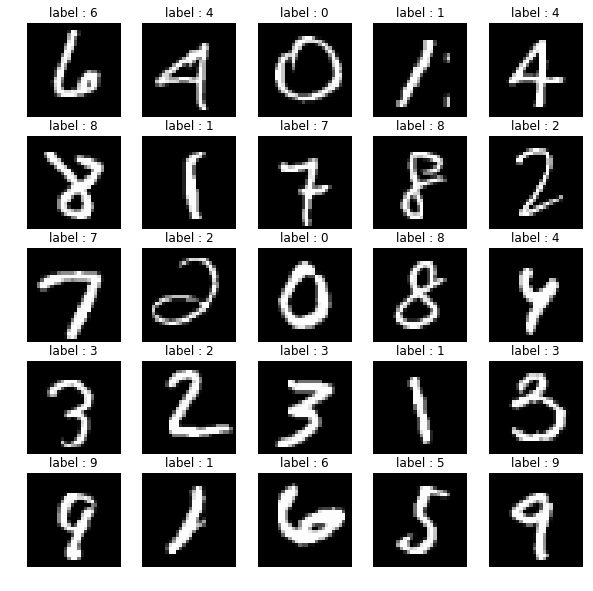

In [33]:
# Training Images
plt.figure(figsize=(10, 10))
count = 0
for i in range(5):
    for j in range(5):
        
        image_id = np.random.randint(0,6000)
        image = x_train[image_id, :, :, 0]
        count += 1
        
        plt.subplot(5, 5, count)
        plt.imshow(image)
        plt.axis('off')
        plt.set_cmap('gray')
        plt.title('label : {0}'.format(y_train[image_id]))
plt.show()

# Test Images
plt.figure(figsize=(10, 10))
count = 0
for i in range(5):
    for j in range(5):
        
        image_id = np.random.randint(0,6000)
        image = x_test[image_id, :, :, 0]
        count += 1
        
        plt.subplot(5, 5, count)
        plt.imshow(image)
        plt.axis('off')
        plt.set_cmap('gray')
        plt.title('label : {0}'.format(y_test[image_id]))
plt.show()